# Jeremy Liu EDA

# Research question: To what extend would Airbnb's room_type including bathroom, bedrooms affect the price? 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('../data/raw/listings.csv')
dataset

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20221223064914,2022-12-23,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.47
1,72571,https://www.airbnb.com/rooms/72571,20221223064914,2022-12-23,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.05
2,923017,https://www.airbnb.com/rooms/923017,20221223064914,2022-12-23,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,https://a0.muscache.com/pictures/f3913158-fa84...,4971086,...,4.85,4.86,4.75,NaN,t,2,2,0,0,3.03
3,944283,https://www.airbnb.com/rooms/944283,20221223064914,2022-12-23,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,https://a0.muscache.com/pictures/9ade4292-c83a...,5100812,...,4.72,4.85,4.57,NaN,f,2,1,1,0,0.61
4,956857,https://www.airbnb.com/rooms/956857,20221223064914,2022-12-23,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,https://a0.muscache.com/pictures/3ab4ff36-81de...,5100812,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,20221223064914,2022-12-23,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,https://a0.muscache.com/pictures/75172404/ba1b...,4584648,...,4.00,4.00,5.00,NaN,f,383,12,363,8,0.02
5190,870046,https://www.airbnb.com/rooms/870046,20221223064914,2022-12-23,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,https://a0.muscache.com/pictures/69952309/fc7e...,4584648,...,5.00,4.00,4.00,NaN,f,383,12,363,8,0.01
5191,894221,https://www.airbnb.com/rooms/894221,20221223064914,2022-12-23,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,https://a0.muscache.com/pictures/62594195/2aa1...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,NaN
5192,894224,https://www.airbnb.com/rooms/894224,20221223064914,2022-12-23,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,0.01


### This step is to get the data with only datas that i need 

In [3]:
df=dataset[["room_type","bathrooms_text","bedrooms","price"]]
df

,room_type,bathrooms_text,bedrooms,price
0,Entire home/apt,1 bath,NaN,"$1,400.00"
1,Entire home/apt,1 bath,NaN,$577.00
2,Entire home/apt,1.5 baths,3.0,"$1,036.00"
3,Entire home/apt,1 bath,2.0,$930.00
4,Private room,1 bath,1.0,$351.00
...,...,...,...,...
5189,Private room,1 bath,1.0,$217.00
5190,Entire home/apt,NaN,1.0,$180.00
5191,Private room,NaN,1.0,$180.00
5192,Private room,NaN,1.0,$140.00


In [4]:
df.shape

(5194, 4)

## From here we know there are 5194 different suits and i do have dropped the bedrooms that doesn't have any data provided.

In [20]:
newdf=pd.read_csv('../data/processed/jeremy_process.csv')
newdf=df.dropna(subset=['bedrooms'])
newdf=newdf.drop(newdf[newdf['bedrooms']==0].index)
newdf =newdf.reset_index(drop=True)
newdf['price'] = newdf['price'].replace({'\$':''}, regex=True)
newdf['price'] = pd.to_numeric(newdf['price'], errors='coerce')
newdf


,room_type,bathrooms_text,bedrooms,price
0,Entire home/apt,1.5 baths,3.0,NaN
1,Entire home/apt,1 bath,2.0,930.0
2,Private room,1 bath,1.0,351.0
3,Entire home/apt,1 bath,1.0,709.0
4,Shared room,8 shared baths,1.0,180.0
...,...,...,...,...
4207,Private room,1 bath,1.0,217.0
4208,Entire home/apt,NaN,1.0,180.0
4209,Private room,NaN,1.0,180.0
4210,Private room,NaN,1.0,140.0


<AxesSubplot:title={'center':'Relation between Price and Room Types'}, xlabel='room_type', ylabel='price'>

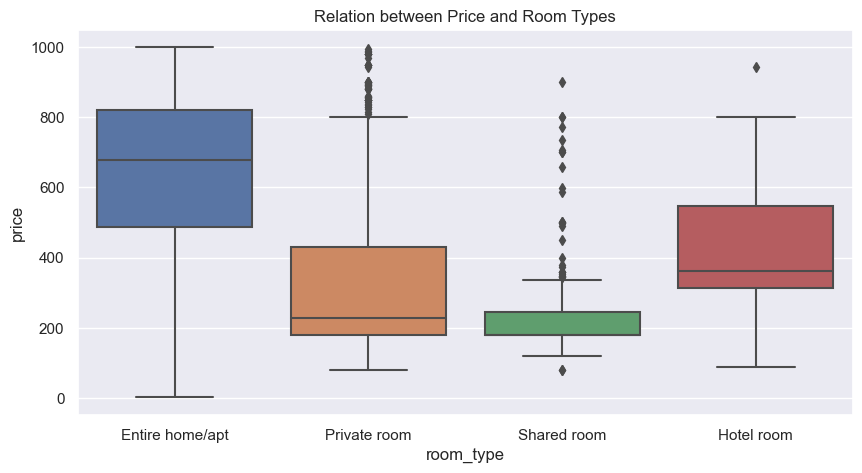

In [73]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))
plt.title('Relation between Price and Room Types')
sns.boxplot(x="room_type", y="price",
    data=newdf)

### This graph tells us the relation between price and different room-types

In [ ]:
newdf = newdf[newdf['price'].between(100, 2600.00)]
newdf

,room_type,bathrooms_text,bedrooms,price
1,Entire home/apt,1 bath,2.0,930.0
2,Private room,1 bath,1.0,351.0
3,Entire home/apt,1 bath,1.0,709.0
4,Shared room,8 shared baths,1.0,180.0
5,Private room,1 bath,1.0,180.0
...,...,...,...,...
4207,Private room,1 bath,1.0,217.0
4208,Entire home/apt,NaN,1.0,180.0
4209,Private room,NaN,1.0,180.0
4210,Private room,NaN,1.0,140.0


### From this we can see that the price would be cheaper in private room,shared room, hotel room compared to entire home/apt

Text(0.5, 1.0, 'Relation between Price and number of Bedrooms')

<Figure size 2000x1000 with 0 Axes>

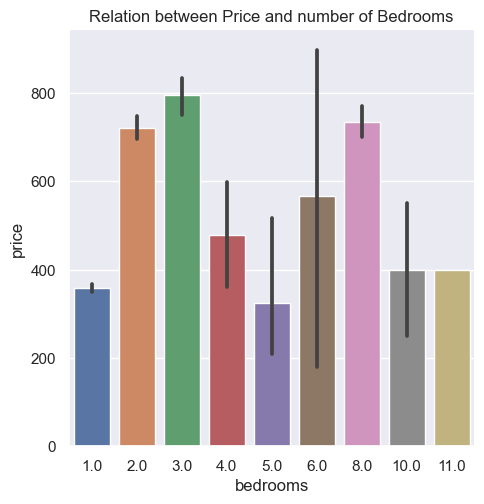

In [14]:
newdf = newdf[newdf['bedrooms'].between(1, 11)]
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.catplot(data=newdf, x="bedrooms", y="price", kind="bar")
plt.title('Relation between Price and number of Bedrooms')

## From the Graph above (Relation between Price and numebr of Bedrooms) You can see that overall the price is increasing by the number of bedrooms. Although the price of 4 rooms, for example, is lower than that of 3 rooms, overall the price is on an upward trend. Later on we will see what is the average bedrooms within each roomtype inorder to answer my question


# From this graph we can see that the price and bedrooms 

<Figure size 2000x1000 with 0 Axes>

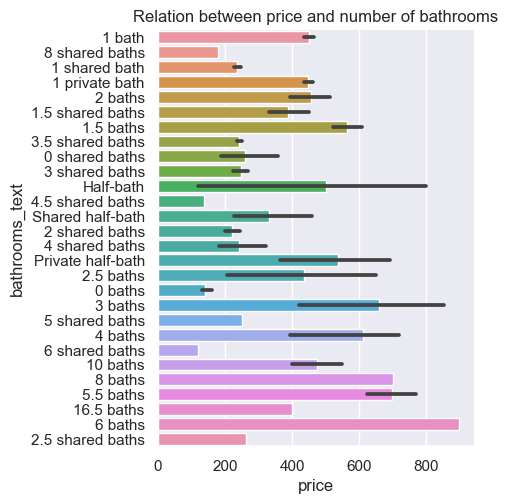

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.catplot(data=newdf, x="price", y="bathrooms_text", kind="bar")
plt.title('Relation between price and number of bathrooms')
newdf.to_csv('../data/processed/jeremy_process.csv', index=False)

## After understanding the relation between price and roomtypes including bathroom,bedrooms. I would like to create diagrams that shows the average price between each factor

In [ ]:
newdf

,room_type,bathrooms_text,bedrooms,price
1,Entire home/apt,1 bath,2.0,930.0
2,Private room,1 bath,1.0,351.0
3,Entire home/apt,1 bath,1.0,709.0
4,Shared room,8 shared baths,1.0,180.0
5,Private room,1 bath,1.0,180.0
...,...,...,...,...
4207,Private room,1 bath,1.0,217.0
4208,Entire home/apt,NaN,1.0,180.0
4209,Private room,NaN,1.0,180.0
4210,Private room,NaN,1.0,140.0


## first is to rename the columns so that it would be easier to work on 

In [110]:
dfm = (
    pd.read_csv('../data/processed/jeremy_process.csv', usecols= ['room_type', 'bathrooms_text', 'bedrooms','price'])
    .rename(columns={"room_type": "Rt", "bathrooms_text":"Bt"})
    .reset_index(drop=True)
)
dfm['bedrooms'] = dfm['bedrooms'].round().astype(int)
dfm

,Rt,Bt,bedrooms,price
0,Entire home/apt,1 bath,2,930.0
1,Private room,1 bath,1,351.0
2,Entire home/apt,1 bath,1,709.0
3,Shared room,8 shared baths,1,180.0
4,Private room,1 bath,1,180.0
...,...,...,...,...
3225,Private room,1 bath,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [111]:
dfm['Bt']=dfm['Bt'].str.replace(r'\D', '', regex=True).dropna()
dfm

,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3225,Private room,1,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [112]:
print(dfm.isnull().sum())

Rt           0
Bt          15
bedrooms     0
price        0
dtype: int64


In [113]:
dfm = dfm.dropna(subset=['Bt'], axis=0)
dfm

,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3222,Entire home/apt,1,1,380.0
3223,Private room,1,1,304.0
3224,Entire home/apt,1,1,487.0
3225,Private room,1,1,217.0


In [117]:
dfm.to_csv('../data/processed/jeremy_process_dfm.csv')
dfm



,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3222,Entire home/apt,1,1,380.0
3223,Private room,1,1,304.0
3224,Entire home/apt,1,1,487.0
3225,Private room,1,1,217.0


# From here, i decided to calculate the average price for each roomtypes, as well as average price for each number of bathrooms and bedrooms. By doing so it would be more accurate to see the relation between them

In [125]:
dfm2 = pd.read_csv('../data/processed/jeremy_process_dfm.csv')
dfm2 = dfm2.drop(columns=['Unnamed: 0'])
average_price_for_Room_types = dfm2.groupby('Rt')['price'].mean()
dfm2['average_price_for_Room_types'] = dfm2['Rt'].map(average_price_for_Room_types)
average_price_for_Bathrooms = dfm2.groupby('Bt')['price'].mean()
dfm2['average_price_for_Bathrooms'] = dfm2['Bt'].map(average_price_for_Bathrooms)
average_price_for_Bedrooms = dfm2.groupby('bedrooms')['price'].mean()
dfm2['average_price_for_Bedroom'] = dfm2['bedrooms'].map(average_price_for_Bedrooms)
dfm2

,Rt,Bt,bedrooms,price,average_price_for_Room_types,average_price_for_Bathrooms,average_price_for_Bedroom
0,Entire home/apt,1.0,2,930.0,646.459538,385.354472,720.625698
1,Private room,1.0,1,351.0,319.908303,385.354472,358.614503
2,Entire home/apt,1.0,1,709.0,646.459538,385.354472,358.614503
3,Shared room,8.0,1,180.0,232.195312,440.000000,358.614503
4,Private room,1.0,1,180.0,319.908303,385.354472,358.614503
...,...,...,...,...,...,...,...
3210,Entire home/apt,1.0,1,380.0,646.459538,385.354472,358.614503
3211,Private room,1.0,1,304.0,319.908303,385.354472,358.614503
3212,Entire home/apt,1.0,1,487.0,646.459538,385.354472,358.614503
3213,Private room,1.0,1,217.0,319.908303,385.354472,358.614503


<Figure size 10000x1000 with 0 Axes>

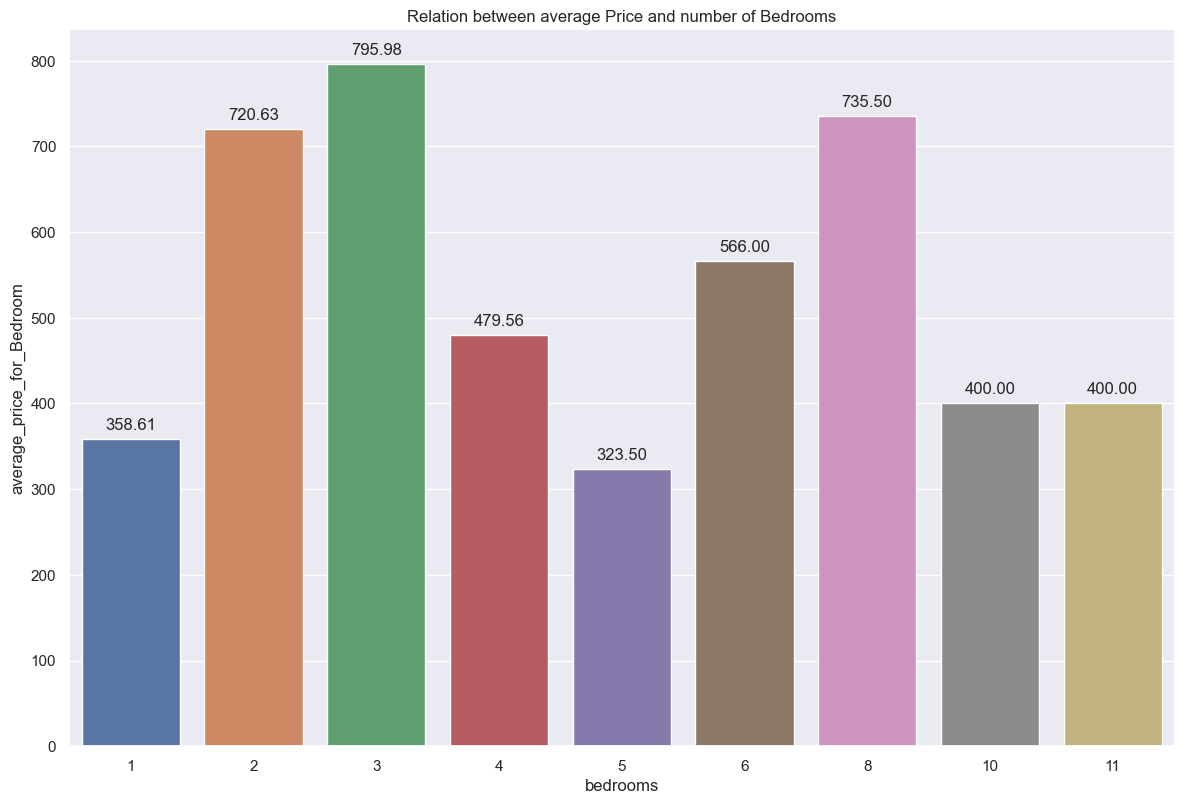

In [149]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(100, 10))
g = sns.catplot(data=dfm2, x="bedrooms", y="average_price_for_Bedroom", kind="bar", height=8, aspect=1.5)
g.set(title='Relation between average Price and number of Bedrooms')

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

plt.show()

### From the above Graph, we can say that when the average number of bedrooms increases, the average price starts to increase. The highest price is 720. Therefor there might be a relation between bedrooms and price

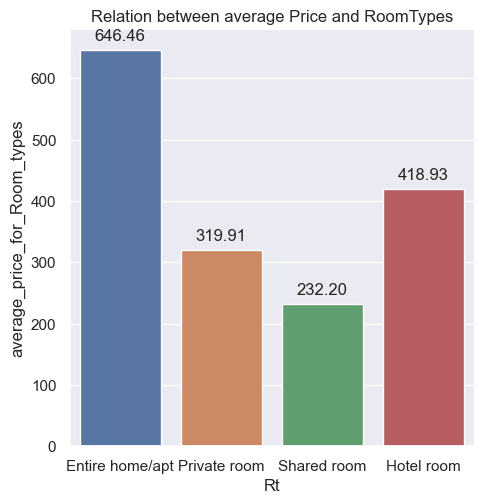

In [161]:
sns.set_theme(style="darkgrid")
g = sns.catplot(data=dfm2, x="Rt", y="average_price_for_Room_types", kind="bar")
plt.title('Relation between average Price and RoomTypes')

for p in g.ax.patches:
    g.ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


### From the above graph relation between average price and number of room types, we can see that the average price for Entire home is around 646

<Figure size 2000x1500 with 0 Axes>

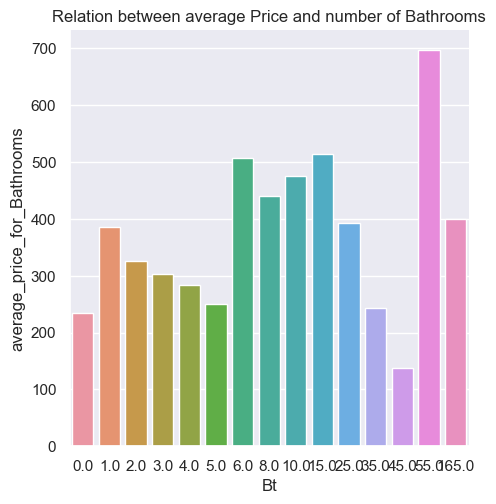

In [155]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.catplot(data=dfm2, x ="Bt", y="average_price_for_Bathrooms", kind="bar")
plt.title('Relation between average Price and number of Bathrooms')
plt.show()

### According to the above graph relation between average price and number of batrooms, it is hard to tell the relation between price and bathrooms. Therefore, i have reason to believe that the number of bathrooms won't affect the price by a lot.

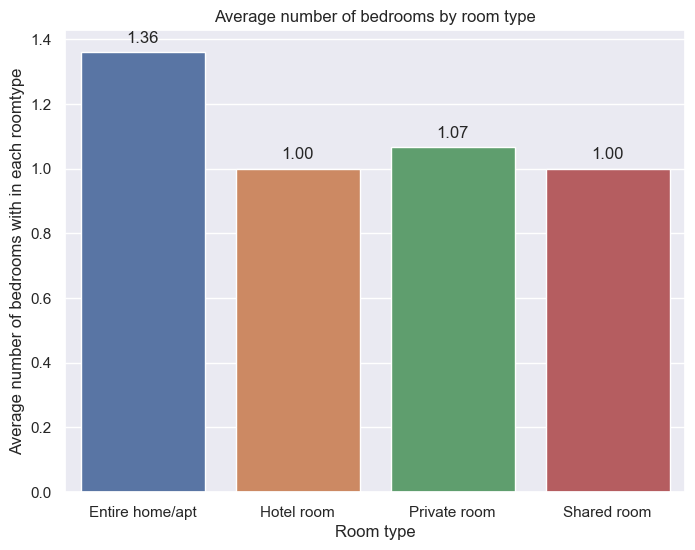

In [160]:
average_bed = dfm2.groupby("Rt")[["bedrooms"]].mean()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.title('Average number of bedrooms by room type')
ax = sns.barplot(x=average_bed.index, y=average_bed["bedrooms"] )
plt.xlabel("Room type")
plt.ylabel("Average number of bedrooms with in each roomtype")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


### For the above graph Average number of bedrooms by room type, since bathrooms can't be seen a lot of relation, we can see that on average, there are 1.36 bedrooms in entire home/apt 

In [163]:
dfm2.to_csv('../data/processed/jeremy_process_finalized.csv')
dfm2



,Rt,Bt,bedrooms,price,average_price_for_Room_types,average_price_for_Bathrooms,average_price_for_Bedroom
0,Entire home/apt,1.0,2,930.0,646.459538,385.354472,720.625698
1,Private room,1.0,1,351.0,319.908303,385.354472,358.614503
2,Entire home/apt,1.0,1,709.0,646.459538,385.354472,358.614503
3,Shared room,8.0,1,180.0,232.195312,440.000000,358.614503
4,Private room,1.0,1,180.0,319.908303,385.354472,358.614503
...,...,...,...,...,...,...,...
3210,Entire home/apt,1.0,1,380.0,646.459538,385.354472,358.614503
3211,Private room,1.0,1,304.0,319.908303,385.354472,358.614503
3212,Entire home/apt,1.0,1,487.0,646.459538,385.354472,358.614503
3213,Private room,1.0,1,217.0,319.908303,385.354472,358.614503


## Conclusion

### According to this search, the relationship between airbnb price and room type as well as bedroom and toilet in Hong Kong has been roughly understood. As you can see from the above pictures, there are a total of 4 types of rooms available for customers on the Hong Kong airbnb software. Among these four types of rooms, the price of Entire room/apt is the highest. The number of reasonable bedrooms will further increase the price. According to the survey, the highest average number of bedrooms is only 1.36 among the four room types. This means that there are very few homes with more than 3 bedrooms. And according to the table of Relation between bedrooms and price we can see that the price of 1-3 bedrooms is increasing. So, as a conclusion，the number of bedrooms will positively affect the price and within these 4 room types, entire home/apt will be the most expensive room type.